# Fast Moving Consumer Goods (FMCG) Supply Chain Management Project 🌐📈


## Company Overview 🏭
### The project revolves around a leading FMCG company that entered the instant noodles business two years ago. The company has identified a significant issue of mismatch between demand and supply, leading to inventory costs and overall loss. The higher management aims to optimize the supply quantity in each warehouse nationwide.

## Data Overview 📊🔍

### The dataset includes information about warehouses, managers, regional zones, and various factors affecting the supply chain.
### Problem: Mismatch in demand and supply, resulting in inventory costs and losses.
### Goal: Build a model using historical data to determine the optimum weight of the product shipped from each warehouse.

## Problem Solving Approach 🛠️💡
1. Exploratory Data Analysis (EDA): Understand the dataset, identify patterns, and gain insights into the business.

2. Data Cleaning: Address missing values, drop unnecessary columns, and prepare the data for analysis.

3. Data Visualization: Create visualizations to understand the distribution, relationships, and trends in the data.

4. Feature Engineering: Enhance the dataset by creating new features or modifying existing ones.

5. Correlation Analysis: Investigate the relationships between variables to understand their impact on the target variable.

6. Data Preprocessing: Encode categorical variables, scale numerical features, and prepare the data for modeling.

7. Model Building: Implement multiple machine learning algorithms to predict the optimum product weight.

8. Model Evaluation: Assess the performance of each model using metrics like Mean Squared Error and R-squared.

9. Model Comparison: Identify the best-performing model based on evaluation metrics.

## Exploratory Data Analysis (EDA) 📊🔍
### Initial exploration of the dataset to understand its structure, size, and variable types.
### Identify key patterns, trends, and potential outliers.
### Utilize visualizations to gain insights into the distribution of various features.

In [38]:
# Importing Libraries and Loading Data 📚💾
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [39]:
# Loading train dataset
train_df = pd.read_csv("/content/drive/MyDrive/data sets/supply_train.csv")

In [40]:
# Displaying the first few rows of the train dataset
train_df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [41]:
# Displaying the shape of the train dataset
train_df.shape

(16620, 25)

In [42]:
# Displaying information about the train dataset, including data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

# Data Cleaning 🧹

In [43]:
# Checking for and summing up duplicated rows in the train dataset
train_df.duplicated().sum()

0

In [44]:
# Checking for and summing up missing values in each column of the train dataset
train_df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [45]:
# Deleting unnecessary columns ('Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID') in the train dataset
train_df = train_df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [46]:
# Filling missing values in the 'workers_num' column with the mean value of that column in the train dataset
train_df['workers_num'].fillna(value=train_df['workers_num'].mean(), inplace=True)

In [47]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value in the train dataset
train_df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [48]:
# Drop Unwanted Column in train_df because half of the values are null values
train_df = train_df.drop(columns=['wh_est_year'])


# The same steps for the test dataset


In [49]:
# Load Test Dataset
test_df = pd.read_csv("/content/drive/MyDrive/data sets/supply_test.csv")

In [50]:
# Displaying the first few rows of the test dataset
test_df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [51]:
# Displaying the shape of the test dataset
test_df.shape

(5529, 25)

In [52]:
# Displaying information about the test dataset, including data types and missing values
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

# Data Cleaning 🧹

In [53]:
# Checking for and summing up duplicated rows in the test dataset
test_df.duplicated().sum()

0

In [54]:
# Checking for and summing up missing values in each column of the test dataset
test_df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [55]:
# Deleting unnecessary columns ('Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID') in the test dataset
test_df = test_df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [56]:
# Filling missing values in the 'workers_num' column with the mean value of that column in the test dataset
test_df['workers_num'].fillna(value=test_df['workers_num'].mean(), inplace=True)

In [57]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value in the test dataset
test_df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [58]:
# Drop Unwanted Column in test_df because half of the values are null values
test_df = test_df.drop(columns=['wh_est_year'])

In [59]:
test_df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

<ipython-input-60-4b384feb2ea1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


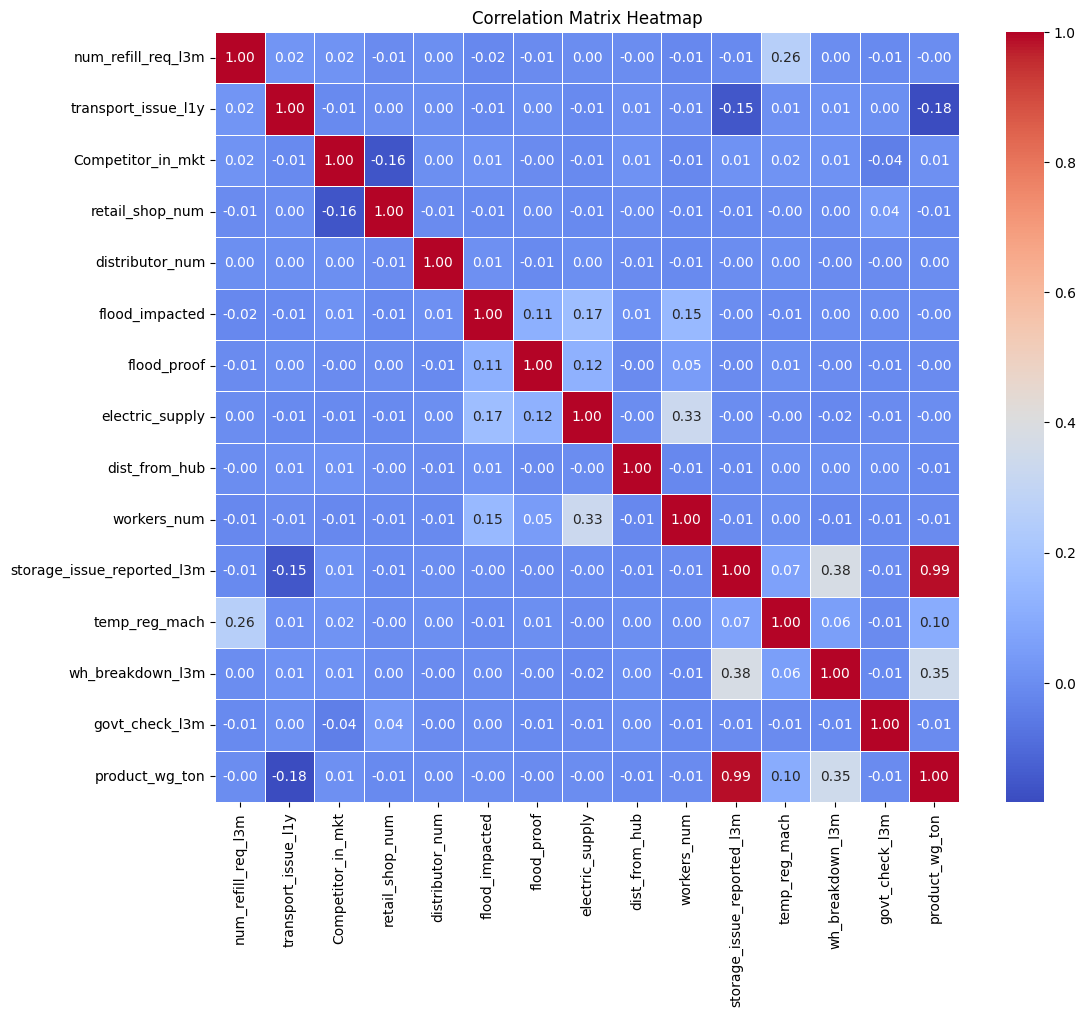

In [60]:
# Plotting Correlation Matrix Heatmap 📊
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Correlation Analysis Report for `product_wg_ton`

## Correlation Strengths:

### Strong Positive Correlations

- **`storage_issue_reported_l3m` (0.99):**
  - There is a very strong positive correlation between the number of reported storage issues in the last 3 months and `product_wg_ton`. A significant increase in reported storage issues is highly associated with an increase in the target variable.

### Moderate Positive Correlations

- **`wh_breakdown_l3m` (0.35):**
  - There is a moderate positive correlation with `product_wg_ton`. An increase in breakdowns in the warehouse in the last 3 months is moderately associated with higher values of the target variable.

- **`temp_reg_mach` (0.10):**
  - A moderate positive correlation with `product_wg_ton`. The registered temperature of machines exhibits some level of positive association with the target variable.

### Moderate Negative Correlation

- **`transport_issue_l1y` (-0.18):**
  - There is a moderate negative correlation with `product_wg_ton`. An increase in transportation issues in the last year is moderately associated with lower values of the target variable.

### Weak Correlations

- **`retail_shop_num` (-0.01), `dist_from_hub` (-0.01), `workers_num` (-0.01), `govt_check_l3m` (-0.01):**
  - These features exhibit weak or negligible correlations with `product_wg_ton`.

## Conclusion

In this analysis, the correlations are categorized based on their strength. The primary feature strongly correlated with `product_wg_ton` is `storage_issue_reported_l3m` with a correlation coefficient of 0.99. The relationships identified in this report provide valuable insights into potential indicators for predicting or understanding variations in `product_wg_ton`. It is recommended to consider these findings in the context of your specific analysis and industry knowledge for a more comprehensive interpretation.


# Droping not Correlated columms

In [61]:
# Droping not Correlated columm in test_df
test_df = test_df.drop(columns=['distributor_num','retail_shop_num','dist_from_hub','workers_num','govt_check_l3m'])

In [62]:
# Droping not Correlated columm in test_df
train_df = train_df.drop(columns=['distributor_num','retail_shop_num','dist_from_hub','workers_num','govt_check_l3m'])

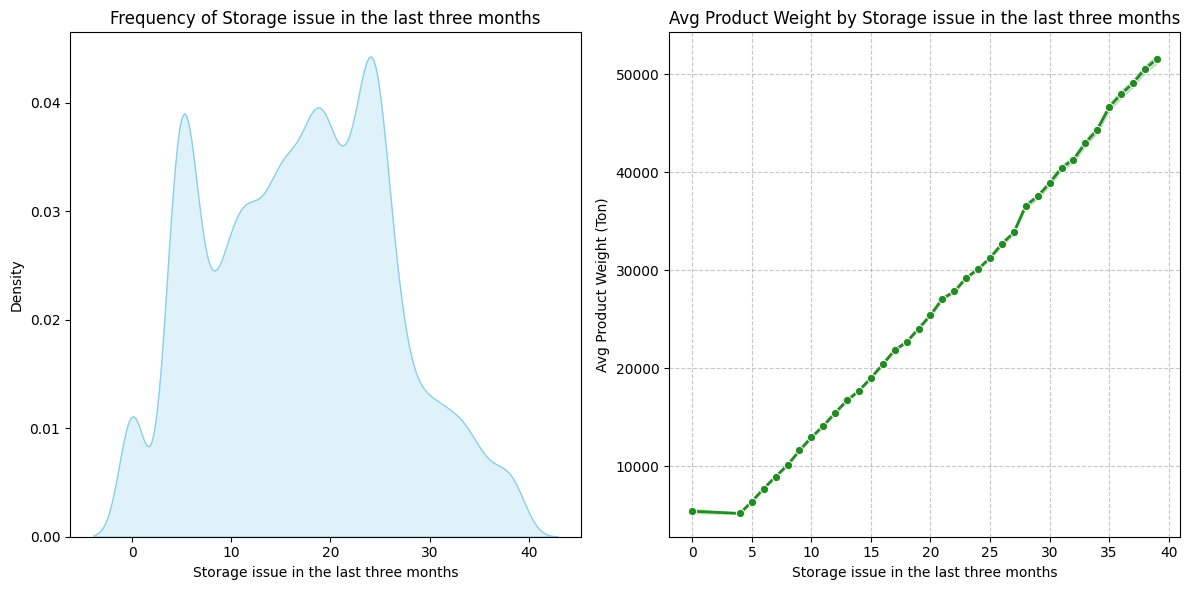

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first KDE plot
sns.kdeplot(data=train_df, x='storage_issue_reported_l3m', fill=True, ax=axes[0], color='skyblue')
axes[0].set_xlabel('Storage issue in the last three months')
axes[0].set_ylabel('Density')
axes[0].set_title('Frequency of Storage issue in the last three months')

# Plotting the second line plot
sns.lineplot(
    data=train_df, x='storage_issue_reported_l3m', y='product_wg_ton',
    color='forestgreen', marker='o', linestyle='-', linewidth=2
)
axes[1].set_xlabel('Storage issue in the last three months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Storage issue in the last three months')

# Add grid to the line plot
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


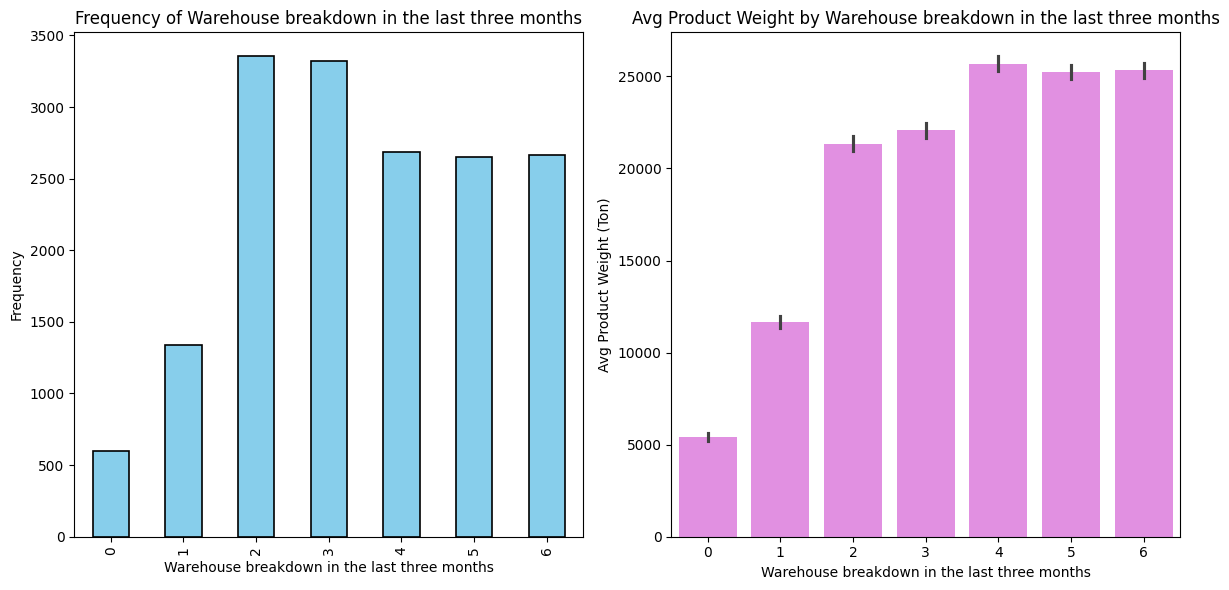

In [64]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
train_df['wh_breakdown_l3m'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black', linewidth=1.2
)
axes[0].set_xlabel('Warehouse breakdown in the last three months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse breakdown in the last three months')

# Plotting the second bar chart
sns.barplot(data=train_df, x='wh_breakdown_l3m', y='product_wg_ton', color='violet', ax=axes[1])
axes[1].set_xlabel('Warehouse breakdown in the last three months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse breakdown in the last three months')

# Adjusting the layout
plt.tight_layout()
plt.show()


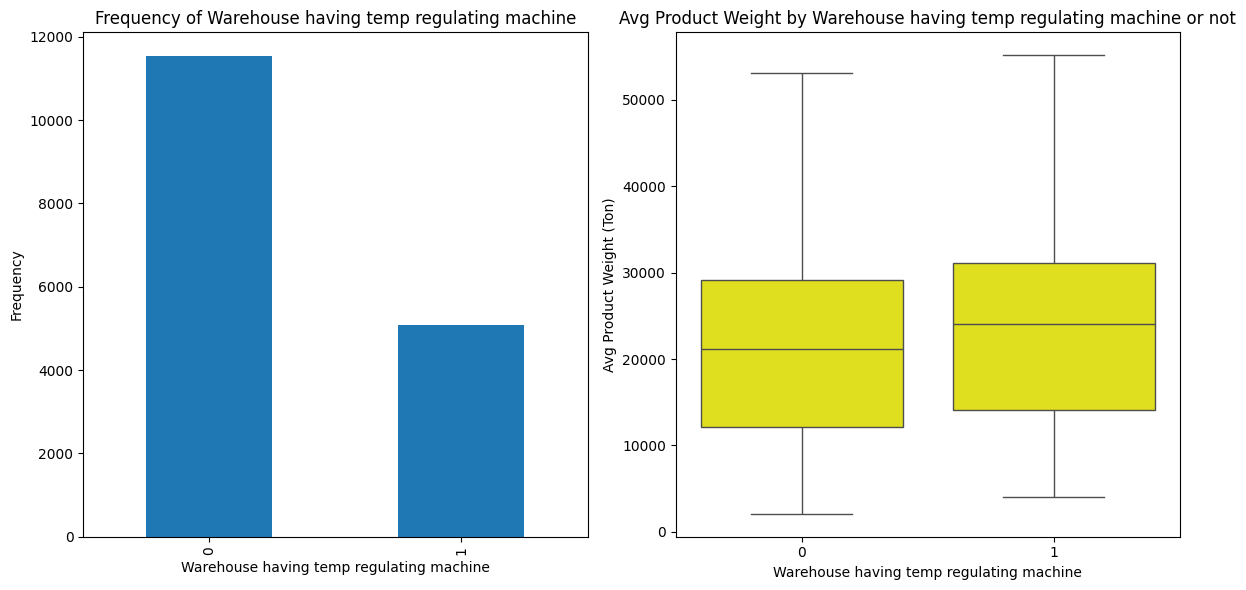

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
train_df['temp_reg_mach'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Warehouse having temp regulating machine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse having temp regulating machine')

# Plotting the second bar chart
sns.boxplot(data=train_df, x='temp_reg_mach', y='product_wg_ton', color='yellow', ax=axes[1])
axes[1].set_xlabel('Warehouse having temp regulating machine')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse having temp regulating machine or not')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


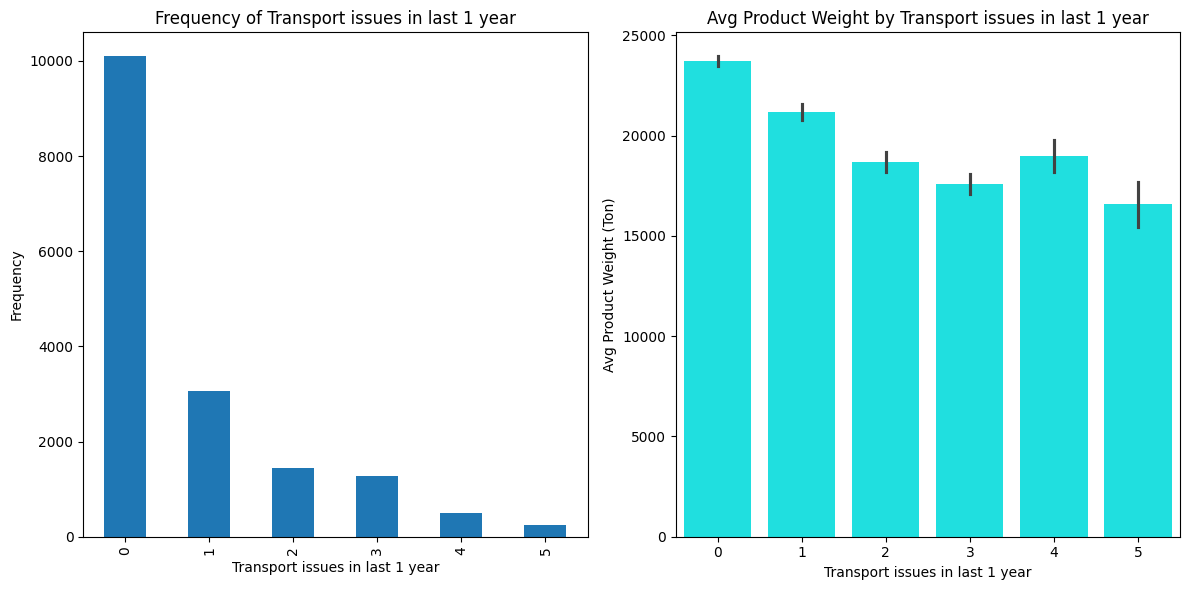

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
train_df['transport_issue_l1y'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Transport issues in last 1 year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Transport issues in last 1 year')

# Plotting the second bar chart
order = train_df['transport_issue_l1y'].unique()
order.sort()
sns.barplot(data=train_df, x='transport_issue_l1y', y='product_wg_ton', color='cyan', order=order, ax=axes[1])
axes[1].set_xlabel('Transport issues in last 1 year')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Transport issues in last 1 year')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


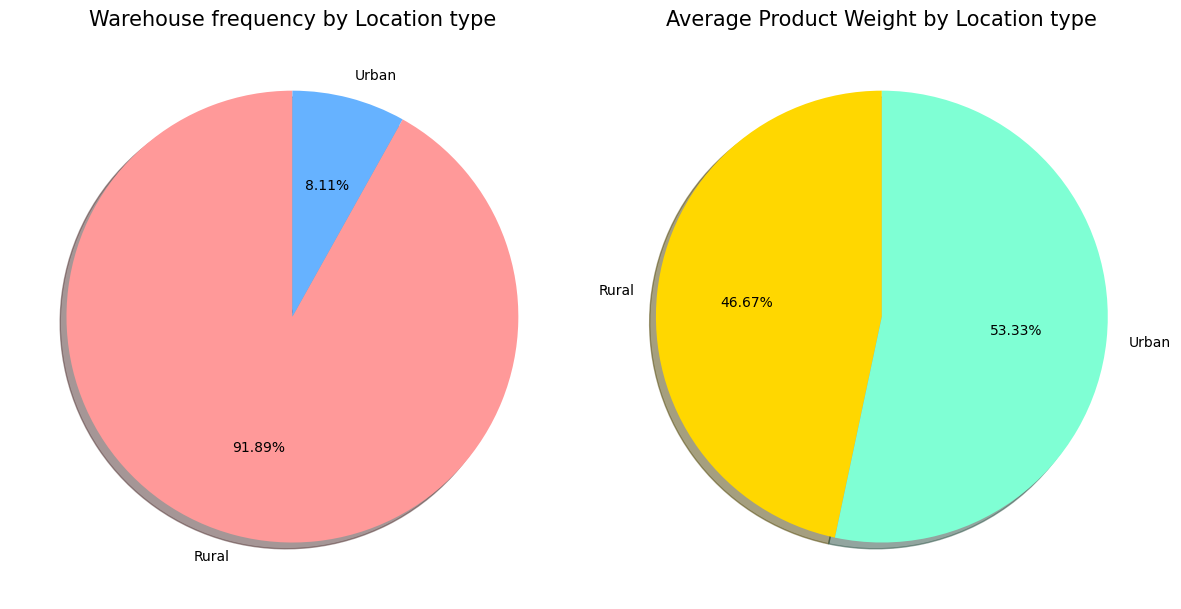

In [67]:
labels = ['Rural', 'Urban']
size_total = train_df['Location_type'].value_counts().tolist()

# colors for the pie charts
colors_freq = ['#FF9999', '#66B2FF']
colors_weight = ['#FFD700', '#7FFFD4']

size_mean = train_df.groupby('Location_type')['product_wg_ton'].mean().to_list()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(size_total, colors=colors_freq, labels=labels, autopct='%.2f%%',
           shadow=True, startangle=90)
axes[0].set_title('Warehouse frequency by Location type', fontsize=15)

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors_weight, labels=labels, autopct='%.2f%%',
           shadow=True, startangle=90)
axes[1].set_title('Average Product Weight by Location type', fontsize=15)

# Adjusting layout
plt.tight_layout()
plt.show()

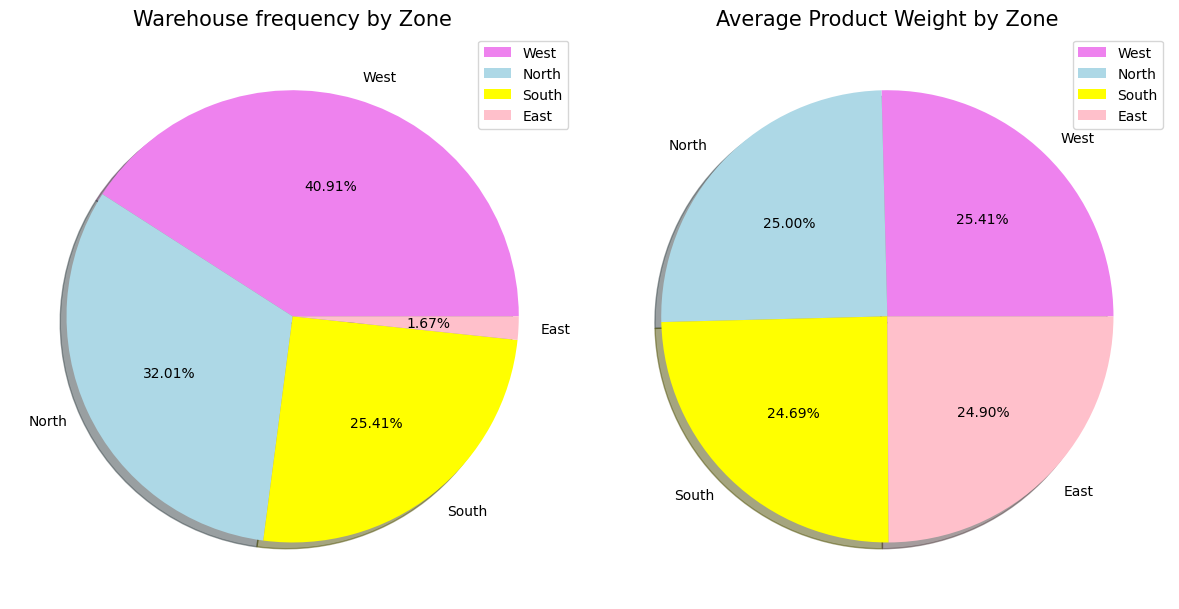

In [68]:
import matplotlib.pyplot as plt


# Get unique labels, total counts, and mean product weights by zone
labels = train_df['zone'].unique().tolist()
size_total = train_df['zone'].value_counts().tolist()
colors = ['violet', 'lightblue', 'yellow', 'pink']
size_mean = train_df.groupby('zone')['product_wg_ton'].mean().tolist()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(size_total, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[0].set_title('Warehouse frequency by Zone', fontsize=15)
axes[0].axis('off')
axes[0].legend()

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
axes[1].set_title('Average Product Weight by Zone', fontsize=15)
axes[1].axis('off')
axes[1].legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-69-1caeb8a1dc07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=train_df, palette=palette)
<ipython-input-69-1caeb8a1dc07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=train_df, palette=palette)
<ipython-input-69-1caeb8a1dc07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y='product_wg_ton', data=train_df, palette=palette)
<ipython-input-69-1caeb8a1dc07>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated 

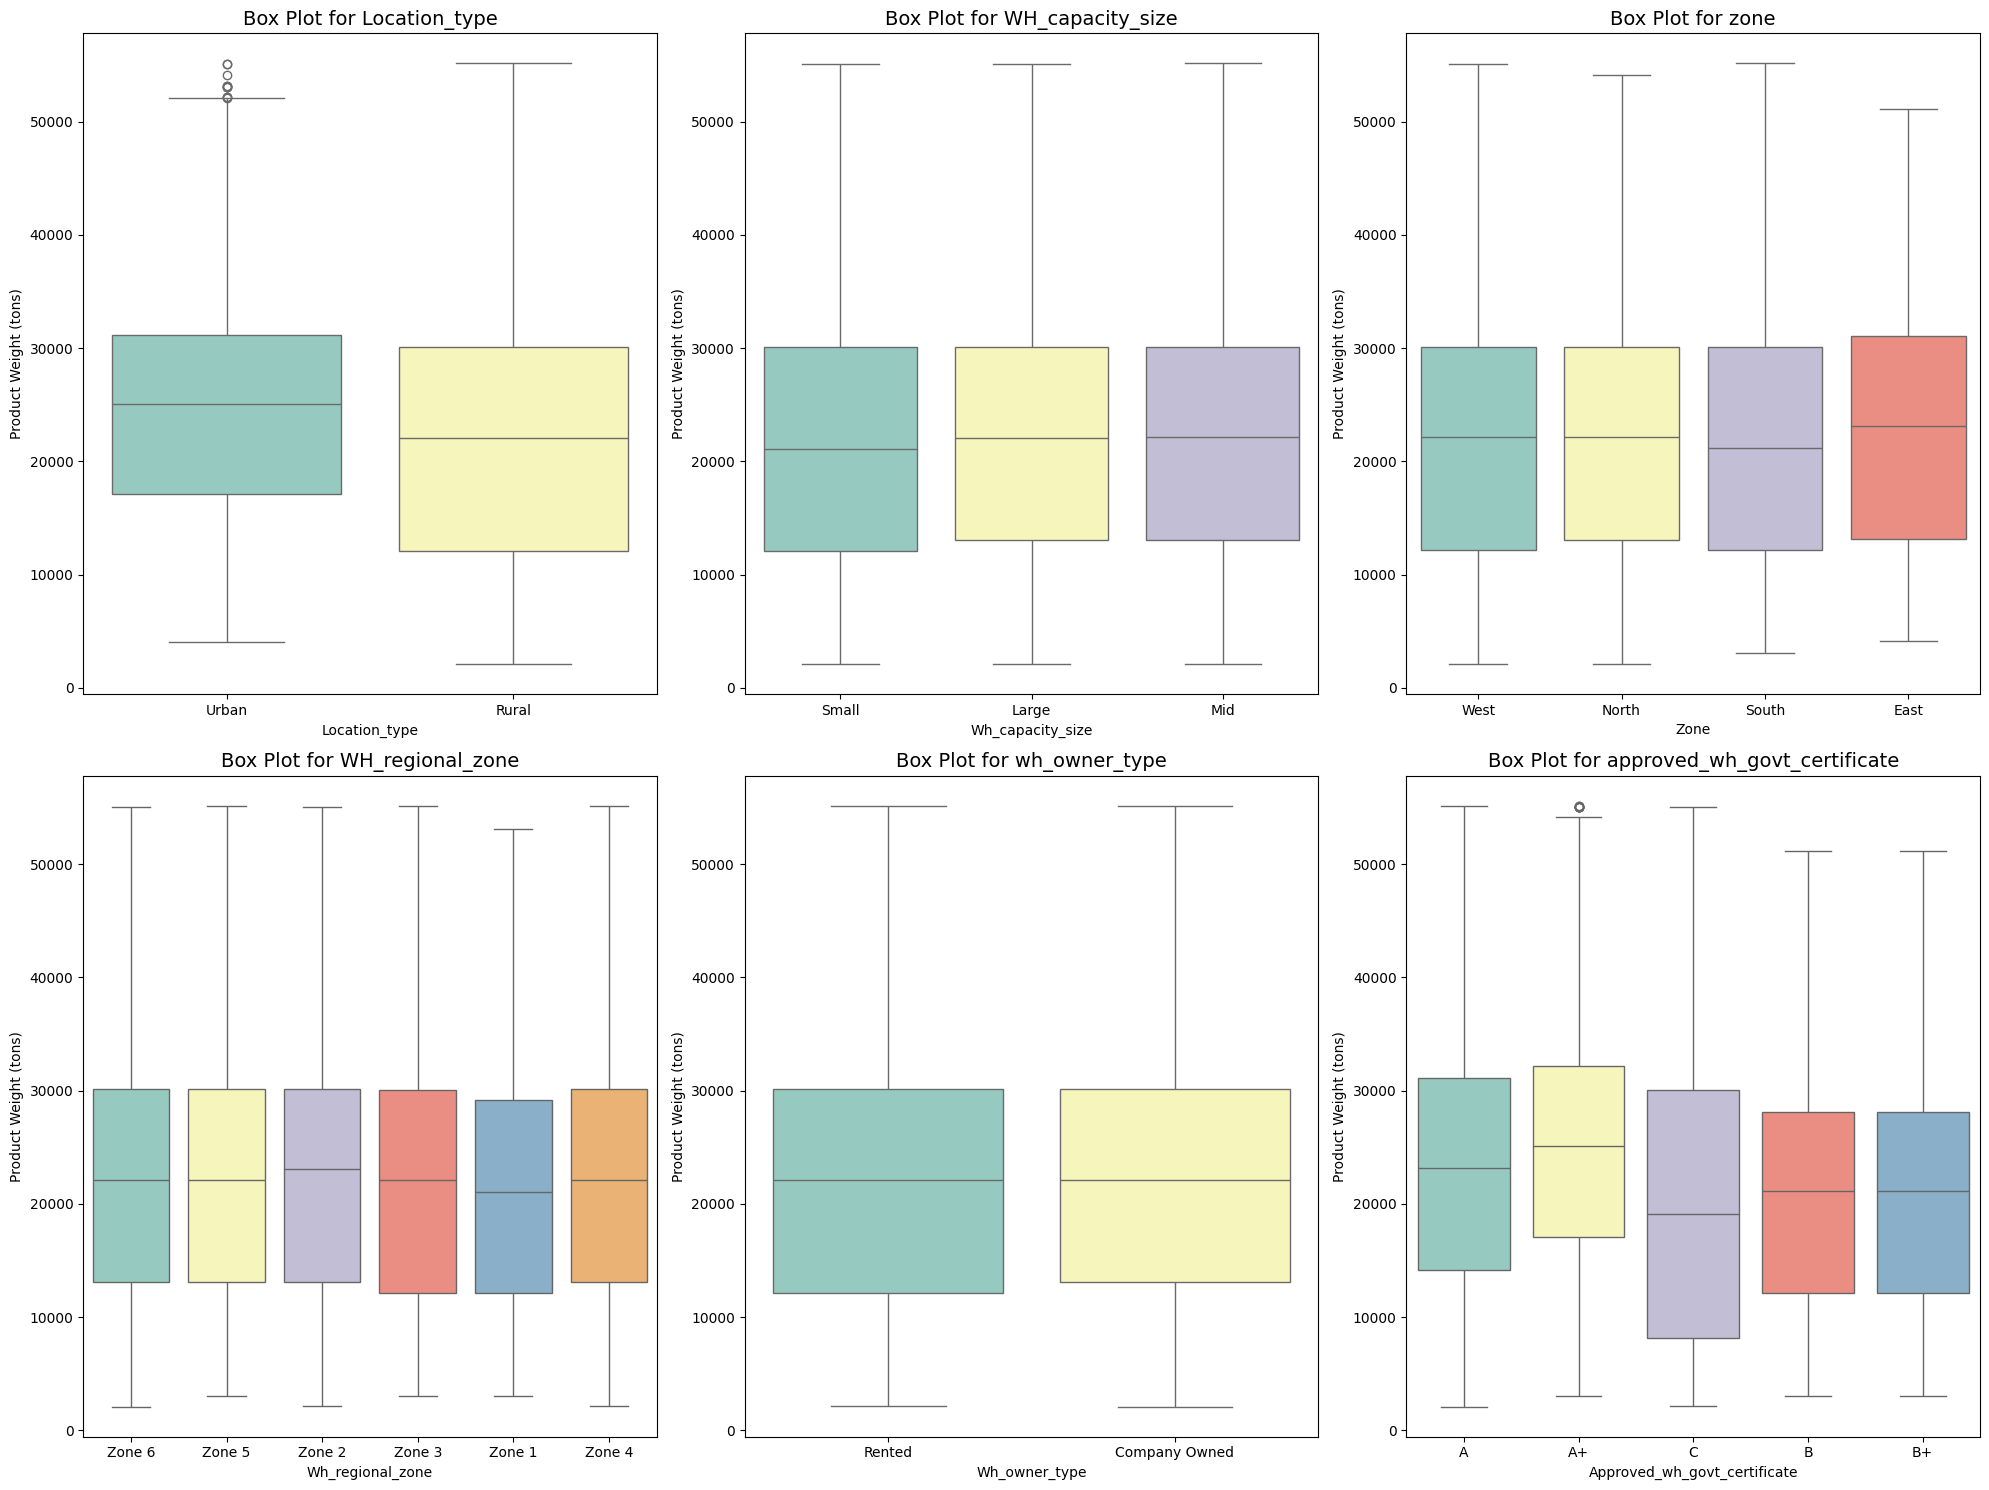

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette (you can choose a different Seaborn color palette)
palette = 'Set3'

categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type',
                          'approved_wh_govt_certificate']

plt.figure(figsize=(20, 15))

# Loop through categorical variables
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)

    # Use Seaborn's boxplot with a specified color palette
    sns.boxplot(x=variable, y='product_wg_ton', data=train_df, palette=palette)

    # Add labels and title
    plt.xlabel(variable.capitalize())  # Capitalize the variable name for better readability
    plt.ylabel('Product Weight (tons)')
    plt.title(f'Box Plot for {variable}', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-71-8f2a42c08f5a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x='product_wg_ton', fill=True, palette='viridis')


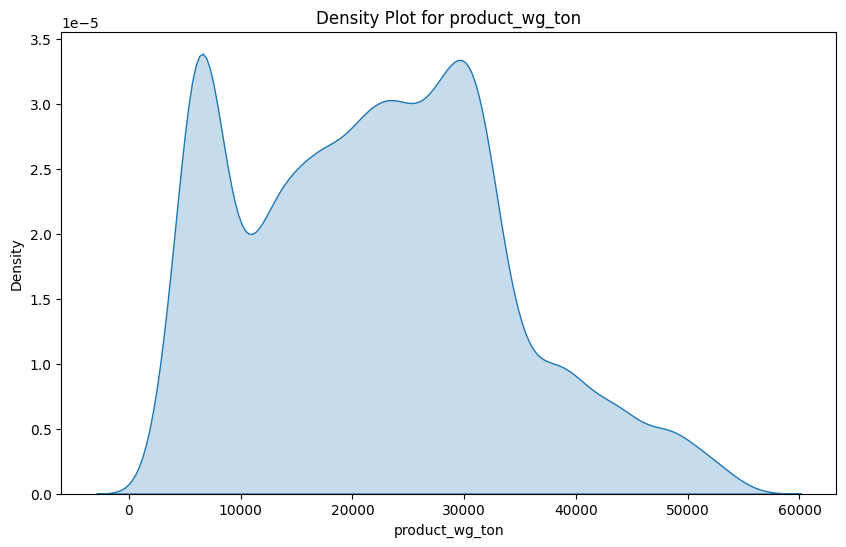

<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
<ipython-input-71-8f2a42c08f5a>:14: UserWarning: Ignoring `palette` because no `

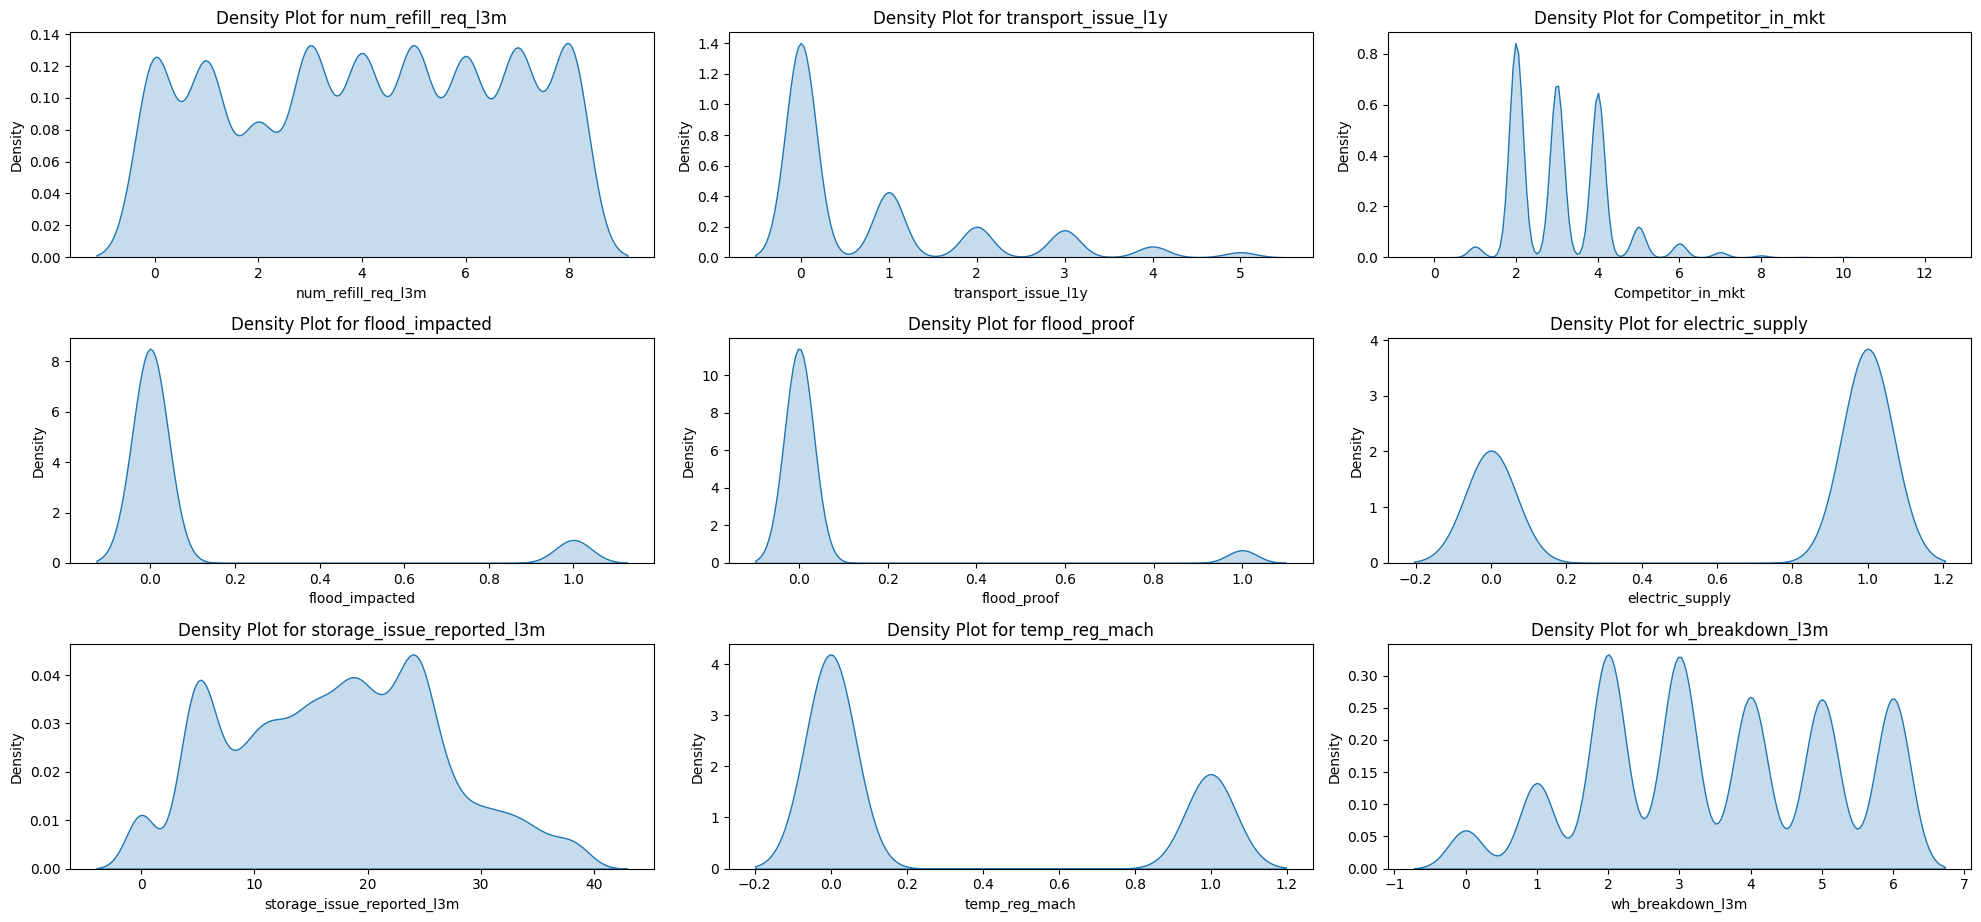

In [71]:
# Density Plot for Dependent Variable 'product_wg_ton' 📊
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x='product_wg_ton', fill=True, palette='viridis')
plt.title('Density Plot for product_wg_ton')
plt.xlabel('product_wg_ton')
plt.show()

# Density Plots for Independent Variables 📊
numeric_variables = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','flood_impacted', 'flood_proof', 'electric_supply','storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m']

plt.figure(figsize=(20, 15))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.kdeplot(data=train_df, x=variable, fill=True, palette='viridis')
    plt.title(f'Density Plot for {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()


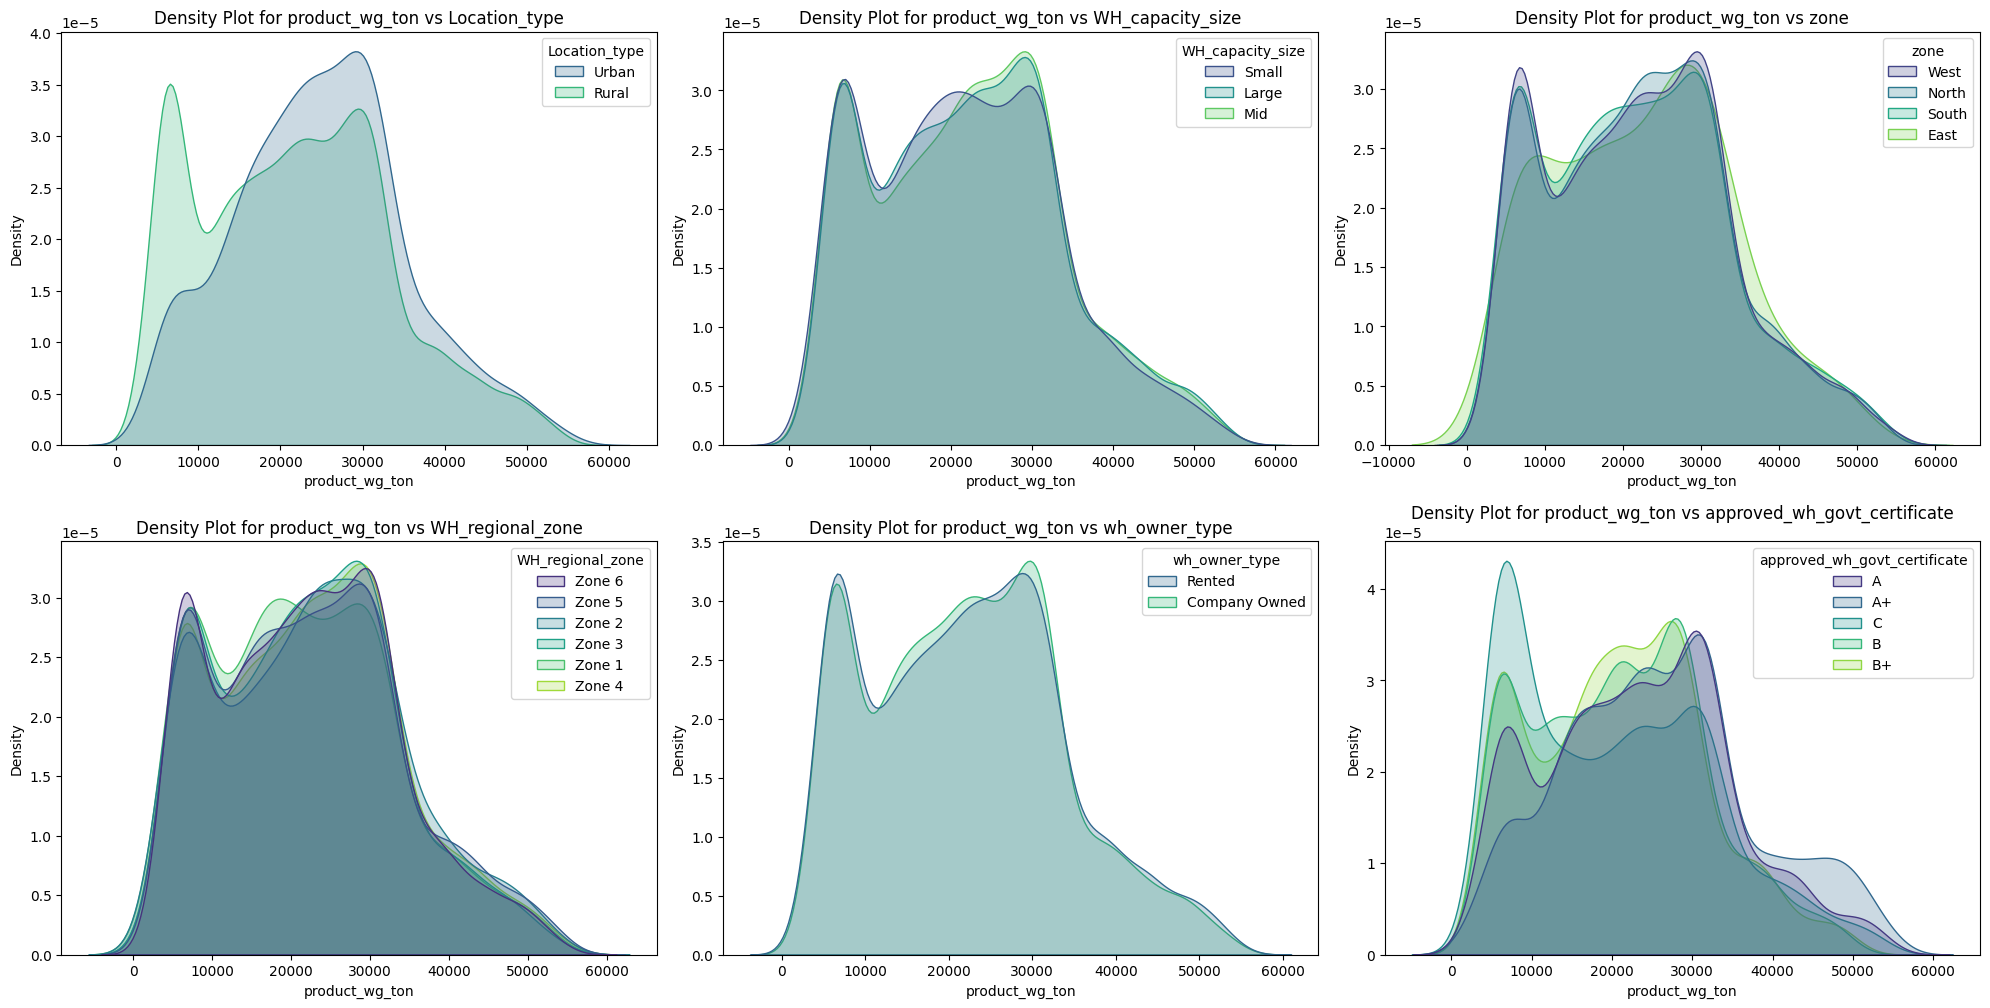

In [72]:
# List of Categorical Variables
categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type',
                          'approved_wh_govt_certificate']

# Create Subplots for Density Plots of Categorical Variables 📊
plt.figure(figsize=(20, 15))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=train_df, x='product_wg_ton', hue=variable, fill=True, common_norm=False, palette='viridis')
    plt.title(f'Density Plot for product_wg_ton vs {variable}')
    plt.xlabel('product_wg_ton')

plt.tight_layout()
plt.show()


# Data Preprocessing

## Label Encoding for train dataset

In [73]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
train_df['Location_type'] = le.fit_transform(train_df['Location_type'])

# Encode 'WH_capacity_size' column
train_df['WH_capacity_size'] = le.fit_transform(train_df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
train_df['approved_wh_govt_certificate'] = le.fit_transform(train_df['approved_wh_govt_certificate'])

# Encode 'zone' column
train_df['zone'] = le.fit_transform(train_df['zone'])

# Encode 'WH_regional_zone' column
train_df['WH_regional_zone'] = le.fit_transform(train_df['WH_regional_zone'])

# Encode 'wh_owner_type' column
train_df['wh_owner_type'] = le.fit_transform(train_df['wh_owner_type'])

# Label Encoding for test dataset

In [74]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
test_df['Location_type'] = le.fit_transform(test_df['Location_type'])

# Encode 'WH_capacity_size' column
test_df['WH_capacity_size'] = le.fit_transform(test_df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
test_df['approved_wh_govt_certificate'] = le.fit_transform(test_df['approved_wh_govt_certificate'])

# Encode 'zone' column
test_df['zone'] = le.fit_transform(test_df['zone'])

# Encode 'WH_regional_zone' column
test_df['WH_regional_zone'] = le.fit_transform(test_df['WH_regional_zone'])

# Encode 'wh_owner_type' column
test_df['wh_owner_type'] = le.fit_transform(test_df['wh_owner_type'])

# Model Building

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()

In [77]:
X_train = train_df.drop('product_wg_ton', axis=1)
y_train = train_df['product_wg_ton']

X_test = test_df.drop('product_wg_ton', axis=1)
y_test = test_df['product_wg_ton']

In [78]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(5529, 15)
(5529,)
(16620, 15)
(16620,)


In [80]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Regression:

Linear Regression - MSE: 2975505.426696004, R-squared: 0.9780565335300061


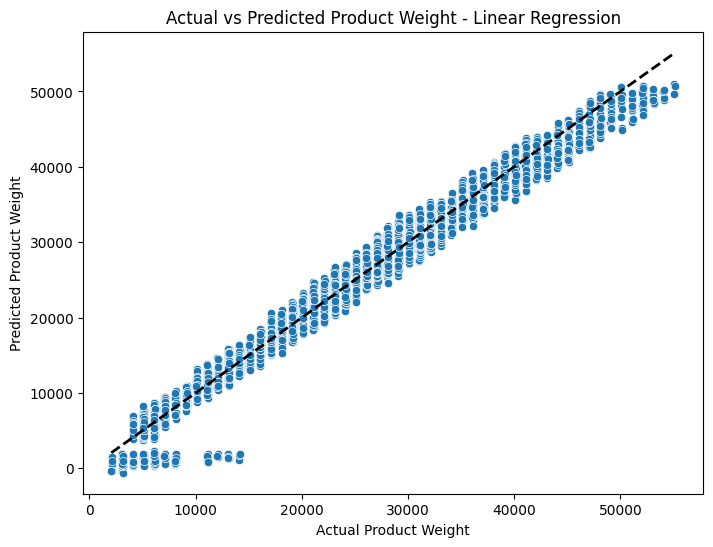

In [81]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, linear_reg_predictions)

#2. Decision Tree:

Decision Tree - MSE: 1711784.910607705, R-squared: 0.9873760960229634


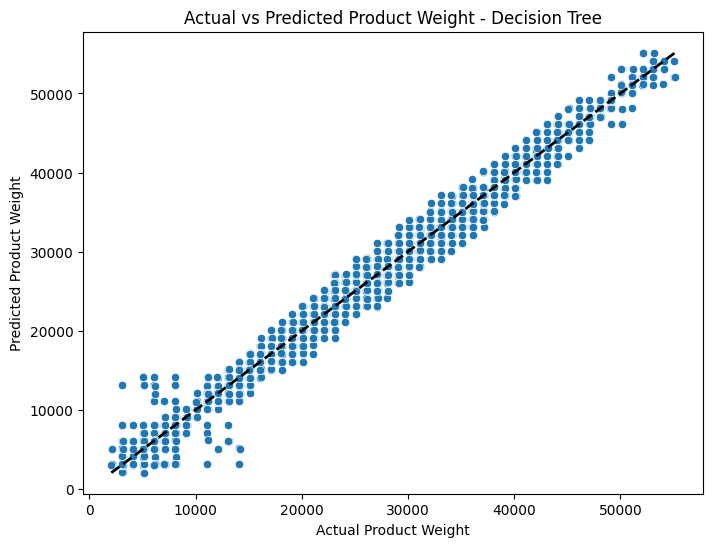

In [82]:
# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')

# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, decision_tree_predictions)

# 3. Random Forest:

Random Forest - MSE: 943822.5754465489, R-squared: 0.9930395895594344


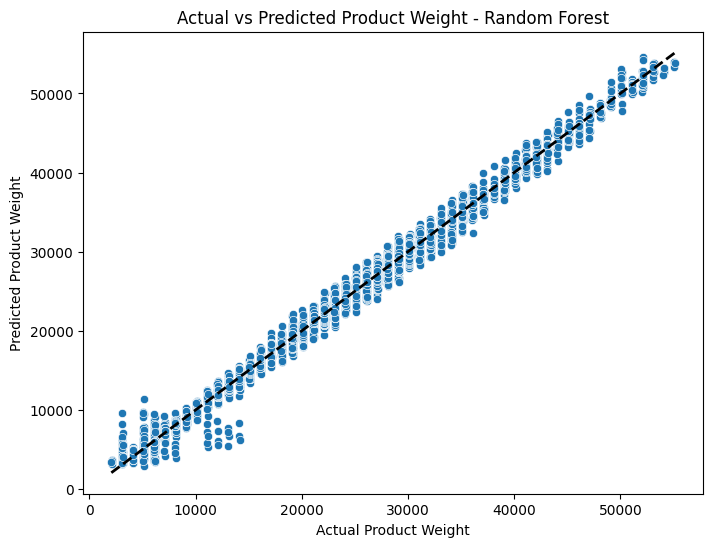

In [83]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

# 4. Support Vector Machine (SVR):

SVR - MSE: 128018566.1147577, R-squared: 0.05590119652539749


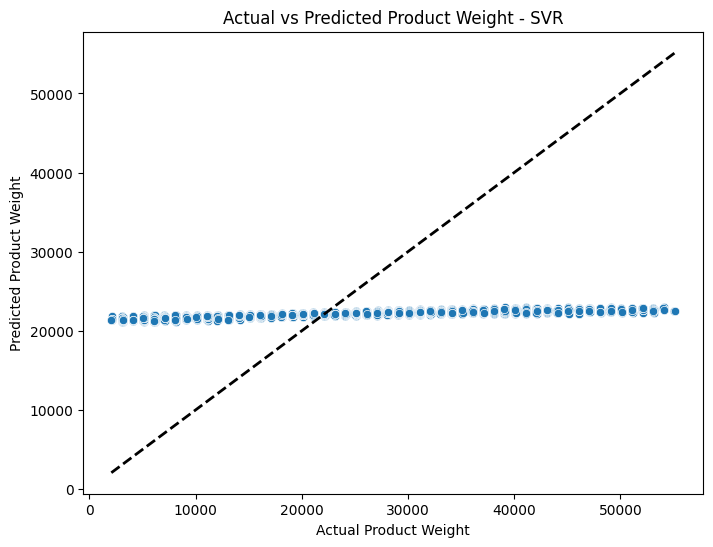

In [84]:
# Initialize and train Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f'SVR - MSE: {svr_mse}, R-squared: {svr_r2}')

# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_predictions)

# 5. XGBoost:

XGBoost - MSE: 890651.4442695004, R-squared: 0.9934317108184605


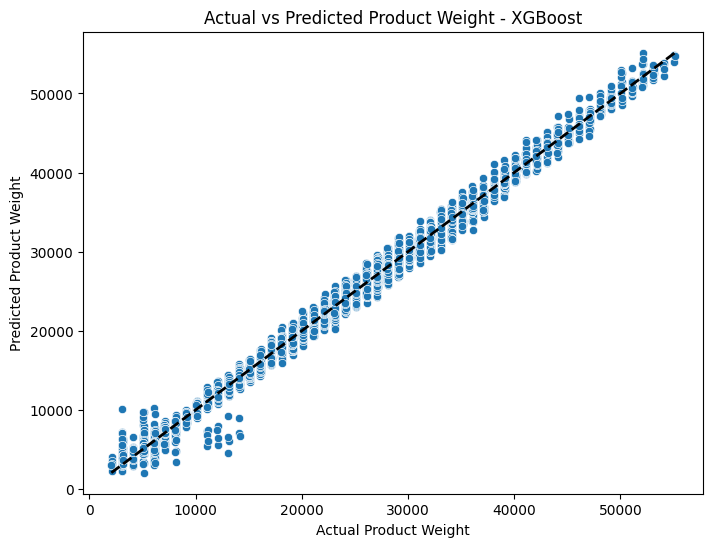

In [85]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_test_scaled)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')

# Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

# 6. Neural Network:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - MSE: 1439460.2632984982, R-squared: 0.9893844092034969


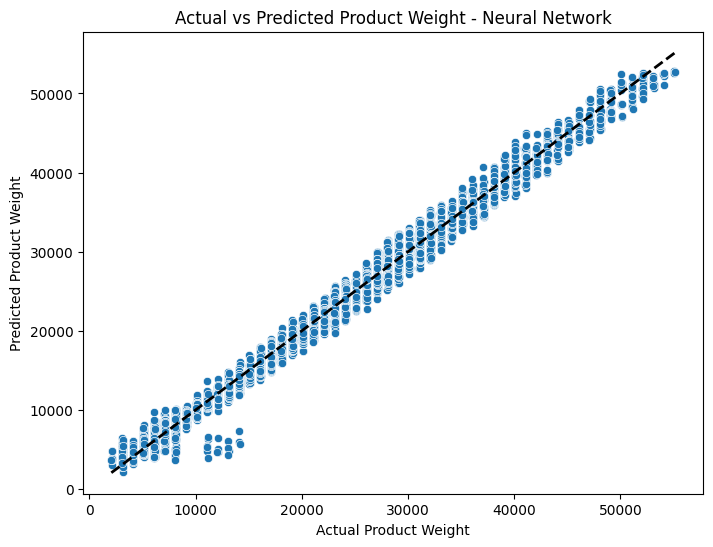

In [86]:
# Initialize and train Neural Network model
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_test_scaled)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)
neural_network_r2 = r2_score(y_test, neural_network_predictions)
print(f'Neural Network - MSE: {neural_network_mse}, R-squared: {neural_network_r2}')

# Scatter plot for Neural Network model
scatter_plot('Neural Network', y_test, neural_network_predictions)

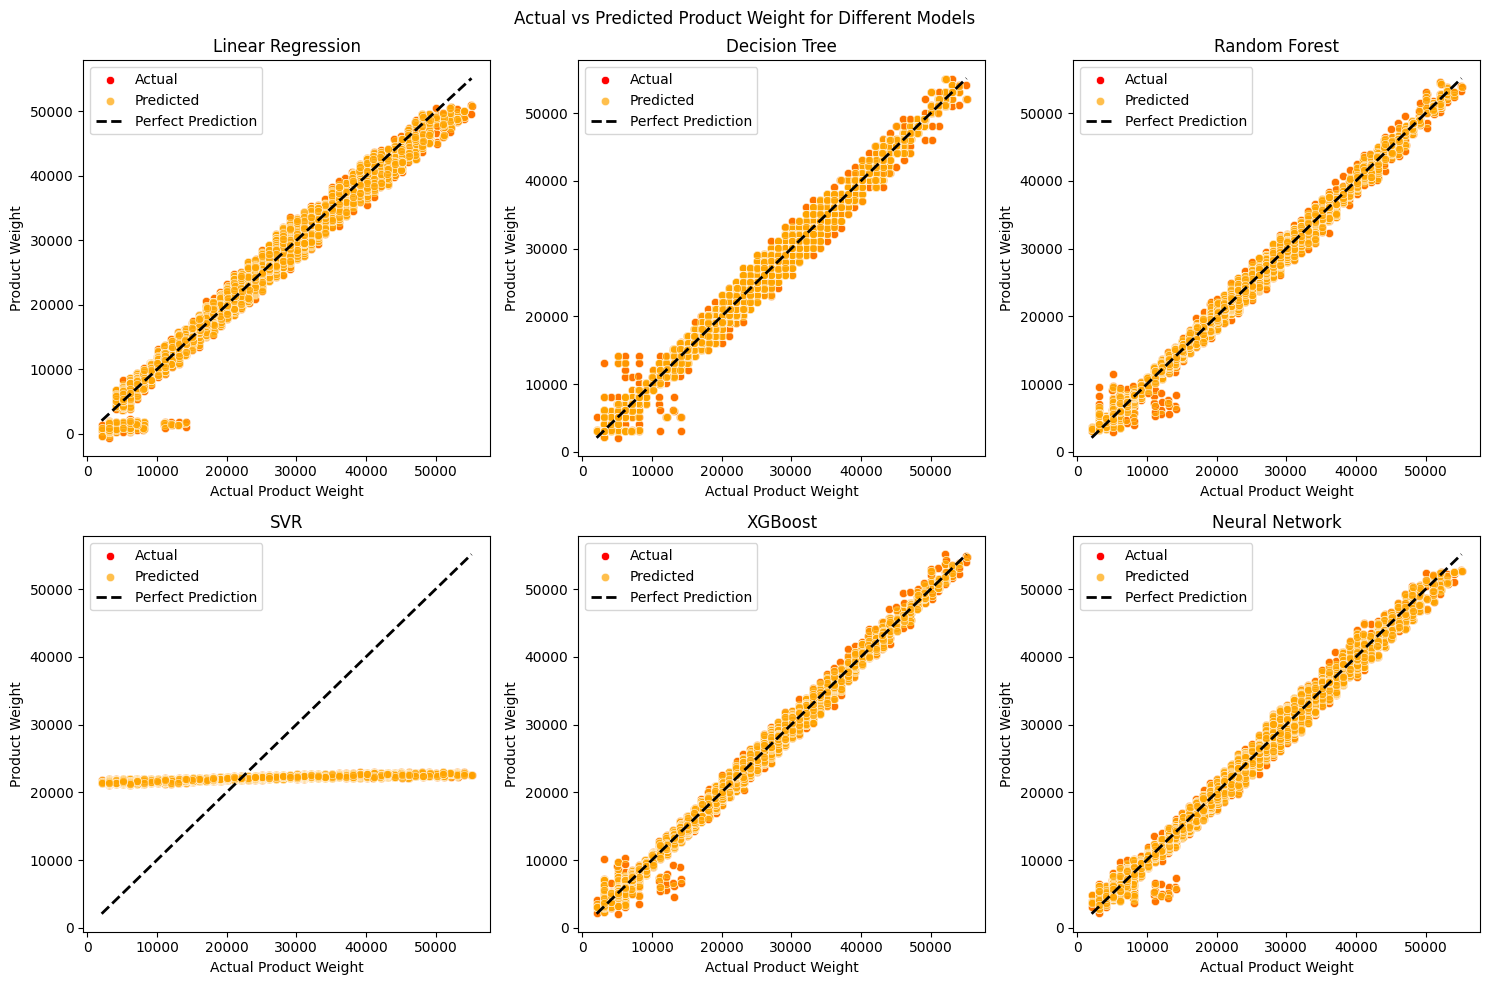

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': linear_reg_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions,
    'SVR': svr_predictions,
    'XGBoost': xgboost_predictions,
    'Neural Network': neural_network_predictions
})

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Actual vs Predicted Product Weight for Different Models',)

# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through each model and plot its scatter plot with different colors
for i, model_name in enumerate(results_df.columns[1:]):
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='red', label='Actual')
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='orange', label='Predicted', alpha=0.7)
    axes[i].plot([results_df['Actual'].min(), results_df['Actual'].max()],
                 [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2, label='Perfect Prediction')
    axes[i].set_xlabel('Actual Product Weight')
    axes[i].set_ylabel('Product Weight')
    axes[i].set_title(model_name)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [97]:
import pandas as pd

# Create a DataFrame to store model names, R2 scores, MSE, and Accuracy Percentage
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'R2 Score': [linear_reg_r2, decision_tree_r2, random_forest_r2, svr_r2, xgboost_r2, neural_network_r2],
    'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})

# Calculate the accuracy percentage based on R2 Score
results_df['R2 Score Percentage'] = (results_df['R2 Score'] * 100).round(2)

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest MSE: {best_model['MSE']} and the highest R2 Score: {best_model['R2 Score']}")

Model Comparison:
               Model  R2 Score           MSE  R2 Score Percentage
0  Linear Regression  0.978057  2.975505e+06                97.81
1      Decision Tree  0.987376  1.711785e+06                98.74
2      Random Forest  0.993040  9.438226e+05                99.30
3                SVR  0.055901  1.280186e+08                 5.59
4            XGBoost  0.993432  8.906514e+05                99.34
5     Neural Network  0.989384  1.439460e+06                98.94

Best Model:
XGBoost has the lowest MSE: 890651.4442695004 and the highest R2 Score: 0.9934317108184605
